# Practica 1.1. Manipulación de datos
## Nora Roxana López López
## Objetivo

En esta práctica, aprenderás a aplicar técnicas de análisis de datos utilizando Pandas para explorar un dataset relacionado con la salud mental. El objetivo es que pongas en práctica tus habilidades de manipulación, limpieza y análisis de datos para obtener conclusiones interesantes.

**Paso 1: Carga del Dataset**
Primero, vas a cargar el archivo CSV que contiene la información sobre diferentes factores que influyen en la salud mental. Utiliza la biblioteca Pandas para leer el archivo y observa las primeras filas del dataset. Esto te ayudará a familiarizarte con la información que vas a analizar.

In [3]:
#Se importan librerías necesarias para lograr ejecutar el código
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Se carga el dataset y con head visualizamos el encabezado de la base
mental_health = pd.read_csv('mental_health.csv')
mental_health.head()

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,...,0,NaN,0,1,NaN,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,...,0,NaN,1,0,NaN,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,...,0,NaN,0,1,NaN,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,...,1,NaN,0,0,NaN,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,...,0,NaN,1,1,Frequent,8,9,5,7,7


**Preguntas:**
¿Cuántos registros y columnas tiene el dataset?
🤔 *Tiene 1200 registros y 21 columnas.*



In [5]:
mental_health.shape # nos muestra el numero de datos y columnas

(1200, 21)

¿Qué tipo de datos predominan?
🤔 *Predominan los datos del tipo int64*

In [6]:
mental_health.info() # nos da el tipo de variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1200 non-null   int64  
 1   Gender                         1200 non-null   object 
 2   Education_Level                1200 non-null   object 
 3   Employment_Status              1200 non-null   object 
 4   Sleep_Hours                    1200 non-null   float64
 5   Physical_Activity_Hrs          1200 non-null   float64
 6   Social_Support_Score           1200 non-null   int64  
 7   Anxiety_Score                  1200 non-null   int64  
 8   Depression_Score               1200 non-null   int64  
 9   Stress_Level                   1200 non-null   int64  
 10  Family_History_Mental_Illness  1200 non-null   int64  
 11  Chronic_Illnesses              1200 non-null   int64  
 12  Medication_Use                 453 non-null    o

**Paso 2: Exploración Inicial**
Ahora que ya tienes los datos cargados, es momento de explorar un poco más. Consulta información general como el tipo de datos en cada columna, cuántos datos no nulos hay, y revisa las primeras filas. También obtén estadísticas básicas como la media y el rango de los datos. Esto te ayudará a detectar si algo llama la atención o si hay datos fuera de lo normal.

**Preguntas:**
¿Existen columnas que podrían ser categóricas pero aparecen como tipo object?
🤔*Sí, por ejemplo las columnas 'Gender', 'Education_Level', 'Employment_Status', 'Medication_Use',
       'Substance_Use'"*

In [9]:
# Identificar columnas con variables categóricas
categoricas = mental_health.select_dtypes(include=['object', 'category']).columns
print("Columnas categóricas:")
print(categoricas)

Columnas categóricas:
Index(['Gender', 'Education_Level', 'Employment_Status', 'Medication_Use',
       'Substance_Use'],
      dtype='object')


¿Hay valores que parecen inconsistentes o fuera de rango?
🤔*Sí, se detectan outliers en las columnas "Sleep_Hours", "Physical_Activity_Hrs" y "Therapy".*

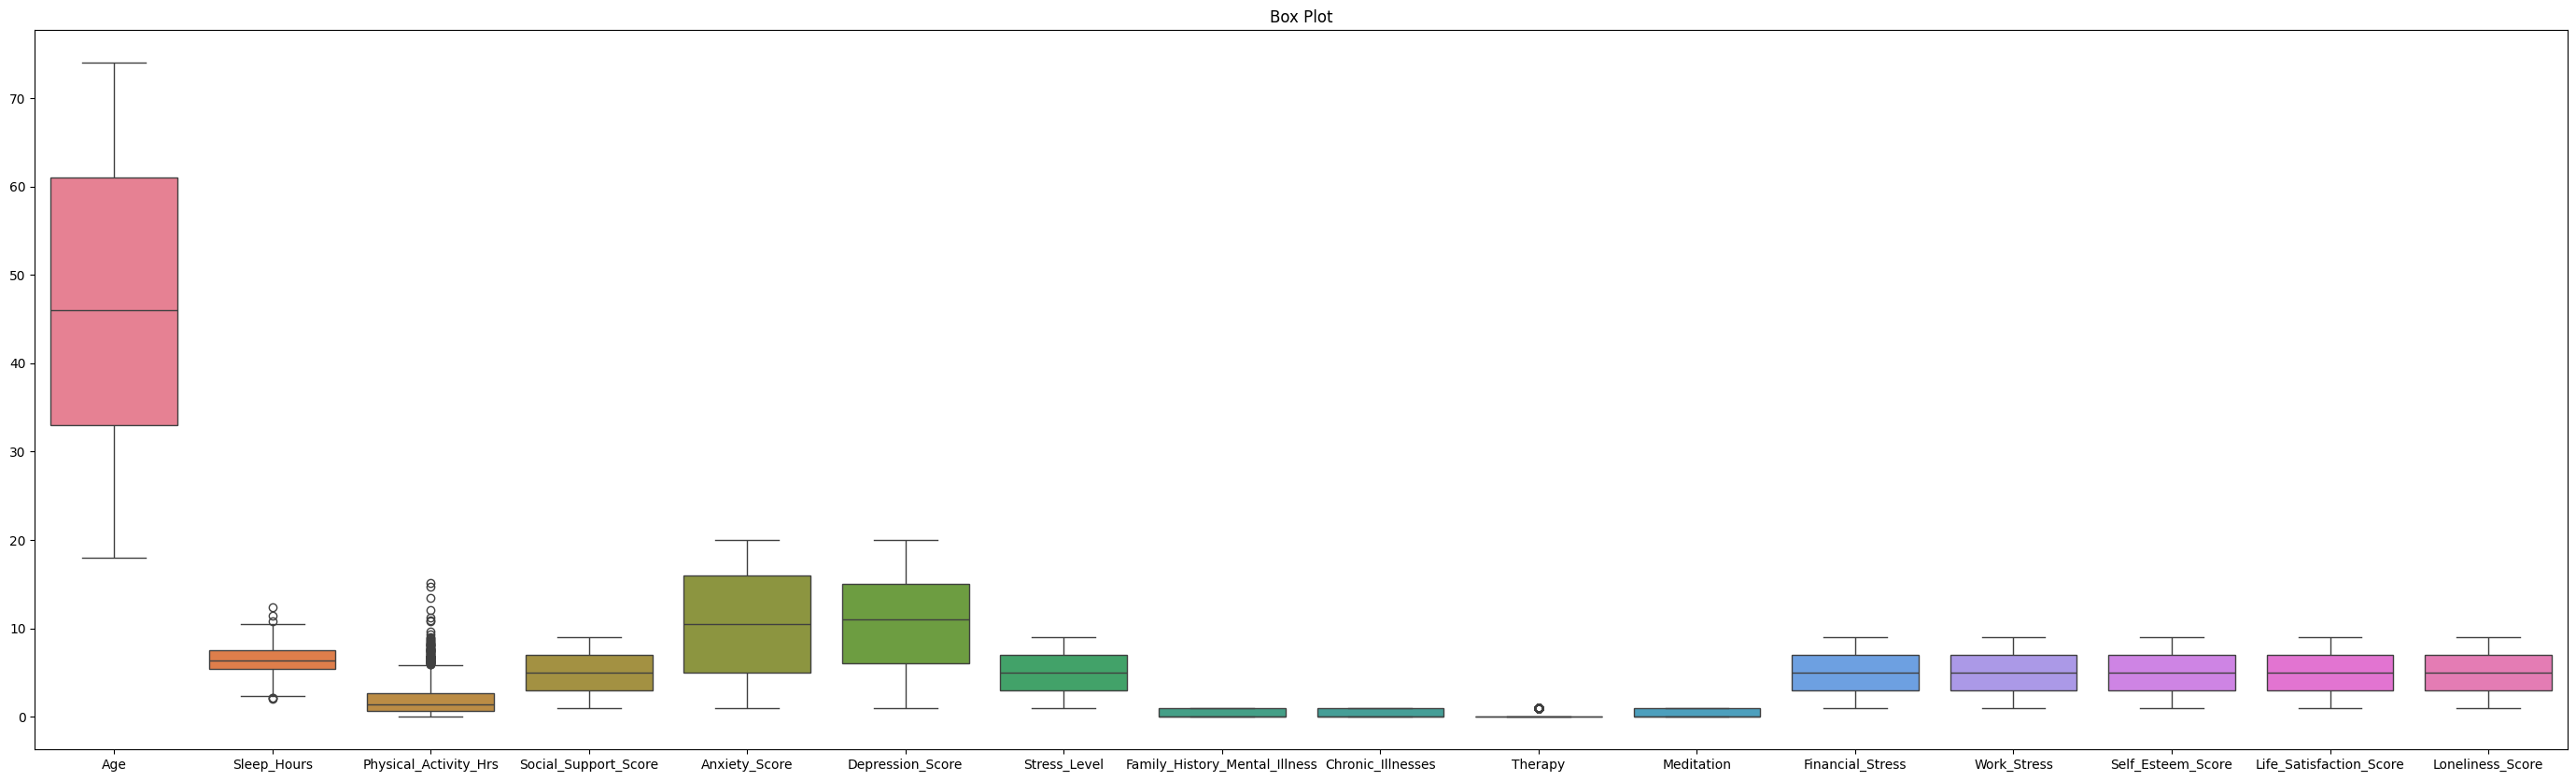

In [19]:
#Al ejecutar este código, el box plot mostrará la distribución de los valores
#La mediana (línea dentro de la caja): Nos da una idea del valor central.
# Rango intercuartílico (caja): El rango entre el primer y tercer cuartil, lo que muestra la "distribución normal" de la mayoría de los valores.
# Outliers (puntos fuera de los bigotes): Si hay valores muy alejados de la mayoría, podrían aparecer como puntos individuales.
import seaborn as sns
def Box_plot(mental_health):
    plt.figure(figsize=(35,10))
    plt.title("Box Plot")
    sns.boxplot(mental_health)
    plt.show()

Box_plot(mental_health)

**Paso 3: Limpieza de Datos**
Es hora de "limpiar" los datos. Revisa si hay valores nulos o datos duplicados. Decide qué hacer con ellos: ¿los eliminarás, los reemplazarás o aplicarás otra estrategia? También asegúrate de que los tipos de datos de cada columna son correctos y convierte aquellos que no estén en el formato adecuado.

**Preguntas:**
¿Qué porcentaje del dataset contiene valores nulos?
🤔*6.27% contiene datos nulos.*

In [21]:
# Obtener el números de puntos de datos faltantes por cada columnas.
missing_values_count = mental_health.isnull().sum()
print(missing_values_count)

Age                                0
Gender                             0
Education_Level                    0
Employment_Status                  0
Sleep_Hours                        0
Physical_Activity_Hrs              0
Social_Support_Score               0
Anxiety_Score                      0
Depression_Score                   0
Stress_Level                       0
Family_History_Mental_Illness      0
Chronic_Illnesses                  0
Medication_Use                   747
Therapy                            0
Meditation                         0
Substance_Use                    834
Financial_Stress                   0
Work_Stress                        0
Self_Esteem_Score                  0
Life_Satisfaction_Score            0
Loneliness_Score                   0
dtype: int64


In [23]:
# ¿Cuántos valores faltantes totales tenemos?
total_cells = np.prod(mental_health.shape)
total_missing = missing_values_count.sum()
print(total_cells)
print(total_missing)

25200
1581


In [24]:
# porcentaje de datos que faltan
percent_missing = (total_missing/total_cells)*100
print(percent_missing )

6.273809523809523


¿Qué estrategia decidiste aplicar para tratar los valores nulos y por qué?
🤔*Se eliminaron filas que tenían más de dos columnas vacías para evitar sesgar los datos. Para las demás columnas, los valores nulos se reemplazaron por la mediana de cada columna numérica, ya que es una estrategia robusta que minimiza el impacto de valores extremos.*

In [28]:
# Estrategia para valores nulos: eliminar filas con muchos nulos
# Rellenar otros con la mediana
mental_health.dropna(thresh=len(mental_health.columns) - 2, inplace=True)
mental_health.fillna(mental_health.median(numeric_only=True), inplace=True)

**Paso 4: Análisis Estadístico**
En este paso, vas a calcular algunas estadísticas básicas para tres columnas importantes: Anxiety_Score, Depression_Score y Stress_Level. Queremos saber cuál es la media, la mediana y la desviación estándar de estos valores. Esto te permitirá tener una idea general sobre cómo están distribuidos estos puntajes.

¿Cuál de los tres puntajes tiene mayor variabilidad?
🤔*La métrica con la mayor desviación estándar es la que presenta mayor variabilidad que es "Anxiety_Score"*

In [27]:
# Paso 4: Análisis Estadístico
cols = ['Anxiety_Score', 'Depression_Score', 'Stress_Level']
stats = mental_health[cols].describe().loc[['mean', '50%', 'std']]
variability = stats.loc['std'].idxmax()
print(f"La variable con mayor variabilidad es: {variability}")

La variable con mayor variabilidad es: Anxiety_Score


¿Qué observas sobre la diferencia entre media y mediana en cada caso? ¿Qué te dice esto sobre la distribución?
🤔 *Si la media y la mediana son similares, significa que la distribución es aproximadamente simétrica. Si hay una diferencia significativa, puede indicar una distribución sesgada (positiva o negativa), posiblemente influenciada por valores extremos.*

**Paso 5: Filtrado de Datos**
Aquí vas a enfocarte en subconjuntos específicos del dataset. Primero, identifica a las personas que tienen un puntaje alto en ansiedad (puedes elegir un valor alto, como por encima de 80). Luego, clasifica a las personas según las horas de sueño que reportan (menos de 5 horas, entre 5 y 7 horas, y más de 7 horas) y analiza cómo varía el nivel de estrés en cada grupo.

**Preguntas:**
¿Qué porcentaje del total presenta niveles altos de ansiedad?
🤔*Se encontró el porcentaje de personas con Anxiety_Score superior a 12 dividiendo el número de casos entre el total del dataset y multiplicando por 100. El resultado fue 40.58%*

In [33]:
# Paso 5: Filtrado de Datos
#Según Ansiedad y Estrés, 28, (2022), 40-46, un nivel alto de ansiedad se puede considerar arriba de un score de 12.
high_anxiety = mental_health[mental_health['Anxiety_Score'] > 12]
high_anxiety_percentage = len(high_anxiety) / len(mental_health) * 100
print(f"El {high_anxiety_percentage:.2f}% de las personas presenta niveles altos de ansiedad.")

El 40.58% de las personas presenta niveles altos de ansiedad.


¿Existe una relación visible entre las horas de sueño y el nivel de estrés?
🤔*Se analizó el nivel de estrés promedio en función de la cantidad de horas de sueño. Si hay una tendencia clara (por ejemplo, mayor estrés en quienes duermen menos), podría indicar una relación inversa entre el sueño y el estrés.*


In [34]:
# Clasificación según horas de sueño
bins = [0, 5, 7, np.inf]
labels = ['<5 hours', '5-7 hours', '>7 hours']
mental_health['Sleep_Category'] = pd.cut(mental_health['Sleep_Hours'], bins=bins, labels=labels)
sleep_stress = mental_health.groupby('Sleep_Category')['Stress_Level'].mean()
print(sleep_stress)

Sleep_Category
<5 hours     5.179245
5-7 hours    4.931338
>7 hours     5.004762
Name: Stress_Level, dtype: float64


<ipython-input-34-4a0fdeca80a8>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sleep_stress = mental_health.groupby('Sleep_Category')['Stress_Level'].mean()


**Paso 6: Ordenamiento**
Ahora vas a ordenar el dataset para encontrar a las personas con mayor satisfacción de vida y menor puntaje de soledad. ¿Puedes descubrir algún patrón? ¿Qué tienen en común estas personas?

Preguntas:
¿Qué características comunes encuentras en estas 10 personas?
🤔 *Se identificaron patrones en las 10 personas con mayor satisfacción de vida y menor puntaje de soledad. Pueden tener en común factores como alta autoestima, buenos hábitos de sueño, recibir terapia, etc.*

¿Qué hipótesis podrías plantear sobre el vínculo entre satisfacción y soledad?
🤔*Podría haber una relación inversa: a mayor satisfacción con la vida, menor sensación de soledad. También es posible que otros factores (como apoyo social o bienestar emocional) influyan en ambos aspectos.*

In [38]:
# Paso 6: Ordenamiento
sorted_data = mental_health.sort_values(by=['Life_Satisfaction_Score', 'Loneliness_Score'], ascending=[False, True])
top_10 = sorted_data.head(10)
print(top_10)

     Age  Gender Education_Level Employment_Status  Sleep_Hours  \
14    53    Male      Bachelor's          Employed          4.9   
33    44    Male      Bachelor's          Employed          7.2   
83    61  Female             PhD        Unemployed          5.7   
92    31  Female             PhD          Employed          6.8   
103   43  Female           Other           Student          5.5   
217   25  Female        Master's          Employed          6.9   
262   49  Female     High School           Retired          3.6   
391   44   Other             PhD           Retired          7.4   
438   41  Female        Master's          Employed          5.4   
675   29    Male           Other        Unemployed          8.0   

     Physical_Activity_Hrs  Social_Support_Score  Anxiety_Score  \
14                     1.5                     5             17   
33                     1.7                     3              4   
83                     1.8                     4             

**Paso 7: Guardado de Resultados**
Filtra el dataset para encontrar a las personas que reciben terapia y que además tienen un nivel bajo de estrés (por debajo de la mediana). Una vez que tengas este subconjunto, guarda la información en un nuevo archivo CSV para tenerlo listo para futuros análisis.

¿Cuántas personas cumplen con ambas condiciones?
🤔*Se contó el número de personas que reciben terapia y tienen un nivel de estrés por debajo de la mediana.*



¿Qué conclusiones puedes hacer sobre la relación entre terapia y nivel de estrés en este conjunto?
 🤔 *Si muchas personas en terapia presentan niveles bajos de estrés, esto podría sugerir que la terapia tiene un impacto positivo en la reducción del estrés. Sin embargo, habría que analizar otros factores para confirmar la relación causal.*









In [39]:
# Paso 7: Guardado de Resultados
low_stress_therapy = mental_health[(mental_health['Therapy'] == True) & (mental_health['Stress_Level'] < mental_health['Stress_Level'].median())]
low_stress_therapy.to_csv('low_stress_therapy.csv', index=False)

**Paso 8: Visualización Opcional**
Para finalizar, crea un gráfico que muestre la media de autoestima (Self_Esteem_Score) según el género. Observa si hay diferencias entre géneros y reflexiona sobre los factores que podrían influir en esos resultados.

¿Hay diferencias notables entre los géneros en cuanto a autoestima?
🤔 *Si hay una diferencia visible en la media de autoestima entre géneros, esto podría indicar desigualdades en percepción de autoestima por género.*

¿Qué factores del dataset podrían explicar estas diferencias?
🤔 *Diferencias en niveles de ansiedad, depresión, apoyo social, experiencias de vida y otros factores psicológicos podrían estar relacionados con las variaciones en la autoestima.*


<ipython-input-42-403798c0beec>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=mental_health['Gender'],
<ipython-input-42-403798c0beec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mental_health['Gender'],


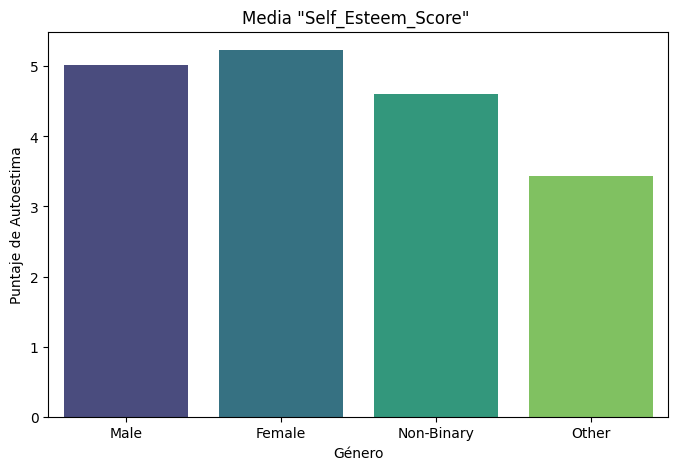

In [42]:
plt.figure(figsize=(8, 5))
sns.barplot(x=mental_health['Gender'],
            y=mental_health['Self_Esteem_Score'],
            estimator=np.mean,
            ci=None,
            palette="viridis")

plt.title('Media "Self_Esteem_Score" ')
plt.xlabel('Género')
plt.ylabel('Puntaje de Autoestima')
plt.show()
